## Getting Data 

In [27]:
import quandl
data2 = quandl.get("EOD/HD", authtoken="dusYQoyrxzBKnR4esBk9")

In [30]:
data2.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,74.83,75.25,73.68,73.90,7802800.0,0.39,1.0,65.913791,66.283747,64.900817,65.094603,7802800.0
2013-09-04,73.98,74.51,73.74,74.14,8271600.0,0.00,1.0,65.165071,65.631920,64.953668,65.306007,8271600.0
2013-09-05,74.07,74.21,72.84,72.99,11039000.0,0.00,1.0,65.244347,65.367666,64.160905,64.293032,11039000.0
2013-09-06,73.55,73.56,72.21,72.70,9968400.0,0.00,1.0,64.786307,64.795115,63.605972,64.037587,9968400.0
2013-09-09,72.98,73.79,72.90,73.58,5781800.0,0.00,1.0,64.284224,64.997710,64.213756,64.812732,5781800.0


In [31]:
data2.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.0,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,118.182440,119.028397,117.356472,118.226147,5.415875e+06,0.010404,1.0,109.371583,110.152952,108.609058,109.412348,5.415875e+06
std,28.181856,28.315220,28.065248,28.208633,2.274563e+06,0.083182,0.0,28.761464,28.900528,28.638959,28.787569,2.274563e+06
min,72.980000,73.560000,72.210000,72.700000,1.517075e+06,0.000000,1.0,64.284224,64.795115,63.605972,64.037587,1.517075e+06
25%,92.310000,93.000000,91.362575,92.127500,3.895442e+06,0.000000,1.0,83.056038,83.712514,82.238611,82.856554,3.895442e+06
50%,120.910000,121.885000,119.690000,120.690000,4.927485e+06,0.000000,1.0,111.522670,112.329684,110.278486,111.601966,4.927485e+06
75%,135.725000,136.495000,134.810000,135.737500,6.349263e+06,0.000000,1.0,127.115128,127.908726,126.454243,127.241542,6.349263e+06
max,190.910000,191.490000,190.010000,190.360000,2.075320e+07,0.890000,1.0,184.068443,184.627658,183.200696,183.538153,2.075320e+07


## Imports 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVR

In [3]:
data.head()

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
None,,,,,,,,,,
0,XOM,2018-12-31,68.32,69.145,67.66,68.19,15609337.0,0.0,68.19,2018-12-31
1,XOM,2018-12-28,69.18,69.580,67.82,68.17,19617793.0,0.0,68.17,2018-12-28
2,XOM,2018-12-27,67.74,68.940,66.08,68.94,21315318.0,0.0,68.94,2018-12-27
3,XOM,2018-12-26,66.18,68.655,64.65,68.64,24403048.0,0.0,68.64,2018-12-26
4,XOM,2018-12-24,66.87,67.530,65.44,65.51,14262074.0,0.0,65.51,2018-12-28


In [5]:
data.describe()

,open,high,low,close,volume,dividends,closeunadj
count,2542.000000,2542.000000,2542.000000,2542.000000,2.542000e+03,2542.000000,2542.000000
mean,132.204750,133.693614,130.432864,131.983959,1.499815e+07,0.009845,128.146587
std,78.438636,79.545967,77.082978,78.307055,2.492514e+07,0.094926,78.789863
min,6.840000,7.025000,6.660000,6.710000,4.057780e+05,0.000000,6.710000
25%,77.522500,78.247500,76.222500,77.140000,4.329107e+06,0.000000,72.370000
50%,116.715000,117.695000,115.142500,116.190000,7.691008e+06,0.000000,113.470000
75%,171.392500,173.642500,169.035000,170.940000,1.613247e+07,0.000000,162.960000
max,390.740000,394.280000,386.690000,392.300000,3.418703e+08,1.710000,392.300000


In [6]:
len(data['date'].unique())

82

In [8]:
list(data.groupby('date'))

[(Timestamp('2018-09-04 00:00:00'),
       ticker       date    open     high      low   close        volume  \
  None                                                                     
  81      XOM 2018-09-04   80.41   80.690   79.810   80.29  8.836658e+06   
  163     WMT 2018-09-04   95.80   96.270   95.240   95.36  8.243270e+06   
  245      VZ 2018-09-04   53.55   53.720   52.840   53.19  1.958968e+07   
  327       V 2018-09-04  146.93  147.860  146.667  147.80  7.568539e+06   
  409     UTX 2018-09-04  131.95  131.950  130.530  131.90  2.921105e+06   
  491     UNH 2018-09-04  268.00  269.410  266.570  268.51  2.090827e+06   
  573    TSLA 2018-09-04  296.94  298.190  288.000  288.95  8.251984e+06   
  655     TRV 2018-09-04  131.71  132.240  131.010  132.13  9.731660e+05   
  737      PG 2018-09-04   82.48   82.960   82.070   82.70  5.724181e+06   
  819     PFE 2018-09-04   41.48   41.550   41.220   41.37  1.432714e+07   
  901     NKE 2018-09-04   79.39   80.970   79.000  

In [53]:
(data['ticker'].unique())

array(['XOM', 'WMT', 'VZ', 'V', 'UTX', 'UNH', 'TSLA', 'TRV', 'PG', 'PFE',
       'NKE', 'MSFT', 'MRK', 'MMM', 'MCD', 'KO', 'JPM', 'JNJ', 'INTC',
       'IBM', 'HD', 'GS', 'GE', 'DIS', 'DD', 'CVX', 'CSCO', 'CAT', 'BA',
       'AXP', 'AAPL'], dtype=object)

In [5]:
apple_stocks = data[data['ticker'] == 'AAPL']

In [80]:
apple_stocks.head()

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
None,,,,,,,,,,
2460,AAPL,2018-12-31,158.53,159.36,156.48,157.74,35003466.0,0.0,157.74,2019-01-01
2461,AAPL,2018-12-28,157.50,158.52,154.55,156.23,40808185.0,0.0,156.23,2018-12-28
2462,AAPL,2018-12-27,155.84,156.77,150.07,156.15,50433451.0,0.0,156.15,2018-12-27
2463,AAPL,2018-12-26,148.30,157.23,146.72,157.17,57438006.0,0.0,157.17,2018-12-26
2464,AAPL,2018-12-24,148.15,151.55,146.59,146.83,37155354.0,0.0,146.83,2018-12-28


In [79]:
apple_stocks.describe()

,open,high,low,close,volume,dividends,closeunadj
count,82.000000,82.000000,82.000000,82.000000,8.200000e+01,82.000000,82.000000
mean,200.972195,203.277244,197.941841,200.437317,3.939063e+07,0.008902,200.437317
std,24.968451,25.049350,25.198993,25.256091,1.417867e+07,0.080615,25.256091
min,148.150000,151.550000,146.590000,146.830000,2.156018e+07,0.000000,146.830000
25%,177.140000,180.285000,175.075000,176.712500,3.116115e+07,0.000000,176.712500
50%,215.175000,219.560000,210.795000,213.875000,3.647702e+07,0.000000,213.875000
75%,221.120000,223.332500,218.562500,221.272500,4.335221e+07,0.000000,221.272500
max,230.780000,233.470000,229.780000,232.070000,9.082010e+07,0.730000,232.070000


## Setting X and Y  

In [5]:
X = apple_stocks['date']

In [6]:
y = apple_stocks['open']

In [7]:
X = np.array(X).reshape(-1,1)

In [8]:
y = np.array(y).reshape(-1,1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = False)

## Model Creation

In [10]:
from sklearn.svm import SVR

In [30]:
svr = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

In [21]:
svr.fit(X, y)

/home/shreyashrawat/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
svr_poly.fit(X,y)

/home/shreyashrawat/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shreyashrawat/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
predictions = svr.predict(X)

In [33]:
poly_pred = svr_poly.predict(X)

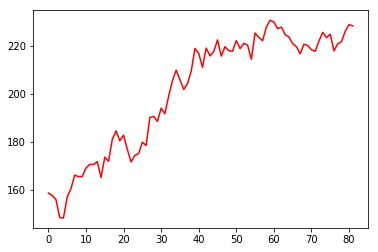

In [36]:
plt.plot(predictions, c = 'red')
plt.plot(poly_pred)

11


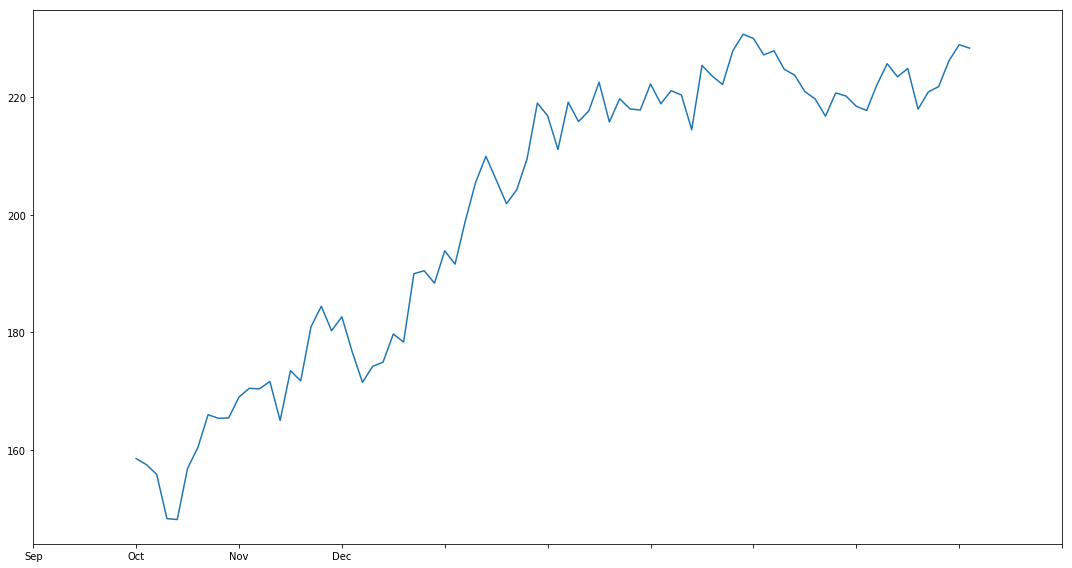

In [92]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(apple_stocks['open'])
plt.xticks(plt.xticks()[0], ['Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
print(len(plt.xticks()[0]))

In [93]:
day = apple_stocks['date'].apply(lambda x: x.date())

In [94]:
len(day.unique())

82

## New approach(Without Date) 

In [33]:
df = pd.DataFrame(data2['Adj_Close'])

In [35]:
df['Predictions'] = df['Adj_Close'].shift(-30)

In [36]:
x = df['Adj_Close']

In [37]:
x = x[:-30]

In [38]:
y = np.array(df['Predictions'])

In [39]:
y = y[:-30]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [41]:
svr_rbf = SVR(kernel = 'rbf', gamma = 0.1)

In [42]:
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [43]:
svr_rbf.fit(x_train, y_train)

/home/shreyashrawat/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
pred = svr_rbf.predict(x_test)

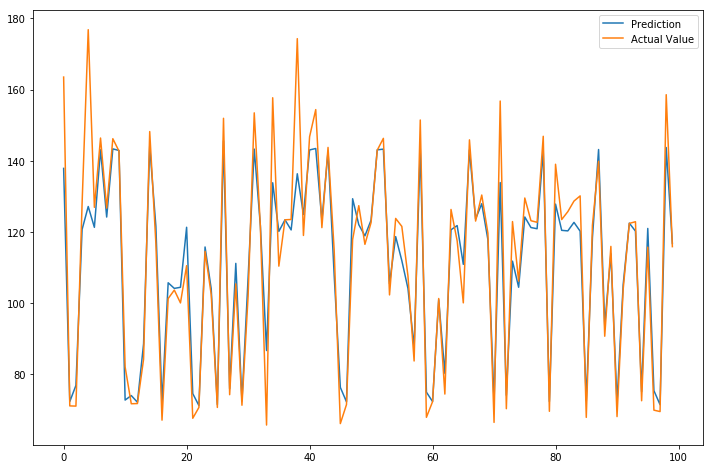

In [48]:
fig = plt.figure(figsize = (12,8))
plt.plot(pred[:100], label = 'Prediction')
plt.plot(y_test[:100], label = 'Actual Value')
plt.legend()